In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("stock_data.csv")

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.set_index('Date', inplace=True)


In [9]:
print(df.describe())

             Open        High         Low      Close        Volume
count   10.000000   10.000000   10.000000   10.00000  1.000000e+01
mean   111.900000  115.700000  110.400000  114.30000  1.088000e+06
std      7.294595    6.650814    7.748835    6.88073  1.345610e+05
min    100.000000  105.000000   98.000000  103.00000  9.000000e+05
25%    106.750000  110.750000  104.750000  109.75000  9.850000e+05
50%    113.000000  116.500000  111.500000  115.00000  1.075000e+06
75%    116.750000  120.500000  115.750000  119.25000  1.187500e+06
max    122.000000  125.000000  121.000000  124.00000  1.300000e+06


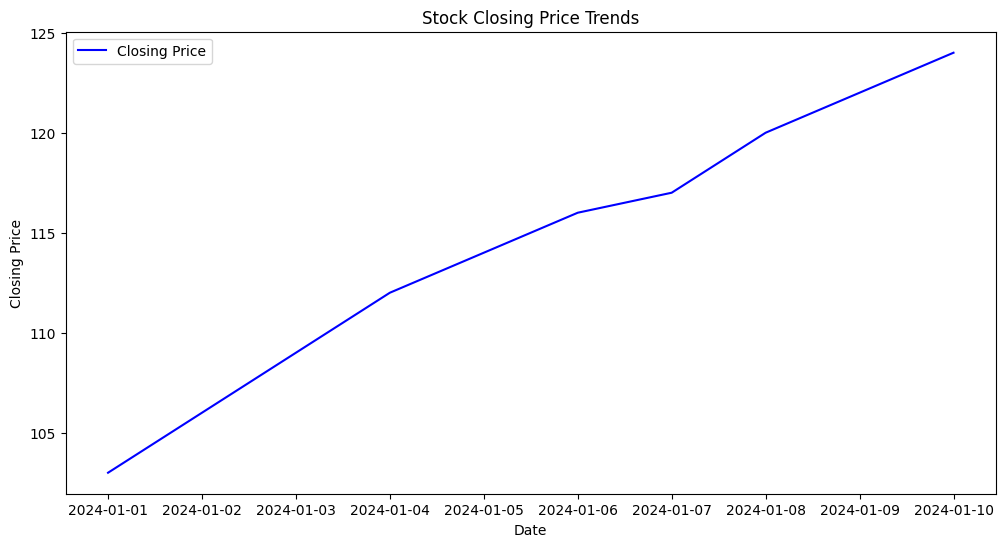

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index, y=df['Close'], label='Closing Price', color='blue')
plt.title("Stock Closing Price Trends")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

In [14]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

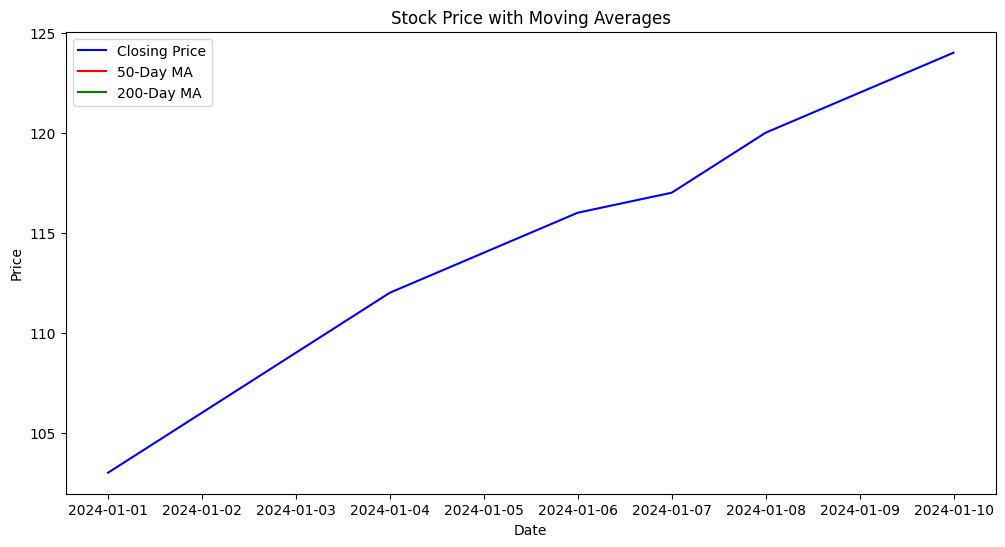

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
plt.plot(df.index, df['MA50'], label='50-Day MA', color='red')
plt.plot(df.index, df['MA200'], label='200-Day MA', color='green')
plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [16]:
df['Daily Return'] = df['Close'].pct_change()

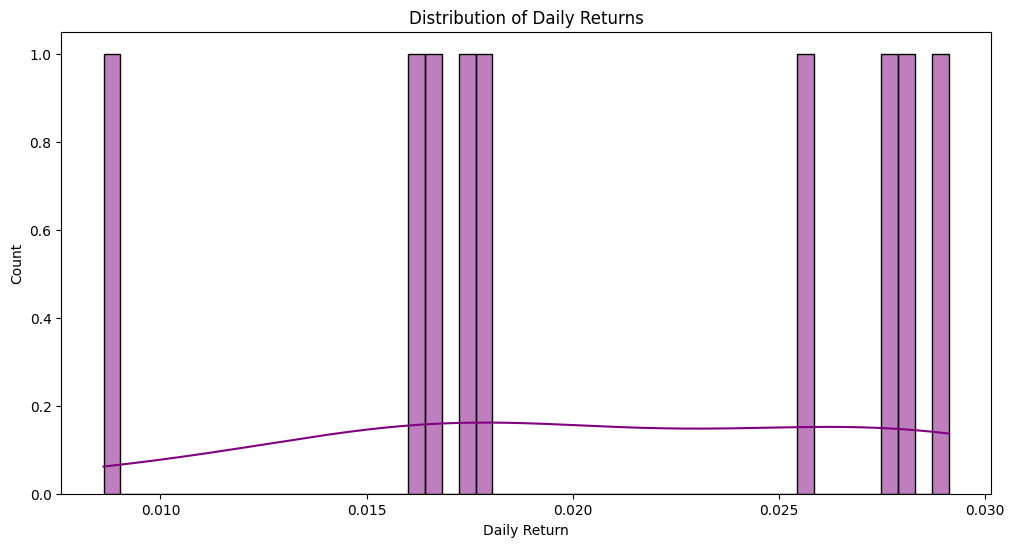

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.show()